In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('idea_anicolon.csv', index_col='nper')

df['sexo'] = df['sexo'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 145166 entries, 1.0 to 1.0
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   sexo            145166 non-null  category
 1   estado_laboral  145166 non-null  object  
 2   sueldo          145166 non-null  float64 
dtypes: category(1), float64(1), object(1)
memory usage: 3.5+ MB


In [3]:
df.sample(5) 

,sexo,estado_laboral,sueldo
nper,,,
3.0,1.0,Desocupados propiamente dichos,4000.0
3.0,1.0,Menor 14 años,0.0
3.0,1.0,Ocupados,0.0
2.0,1.0,Ocupados,35000.0
3.0,1.0,Ocupados,0.0


[Text(0, 0, '63750'),
 Text(0, 0, '22473'),
 Text(0, 0, '24536'),
 Text(0, 0, '5805'),
 Text(0, 0, '11835'),
 Text(0, 0, '5227'),
 Text(0, 0, '1733'),
 Text(0, 0, '7888'),
 Text(0, 0, '495'),
 Text(0, 0, '424'),
 Text(0, 0, '1000')]

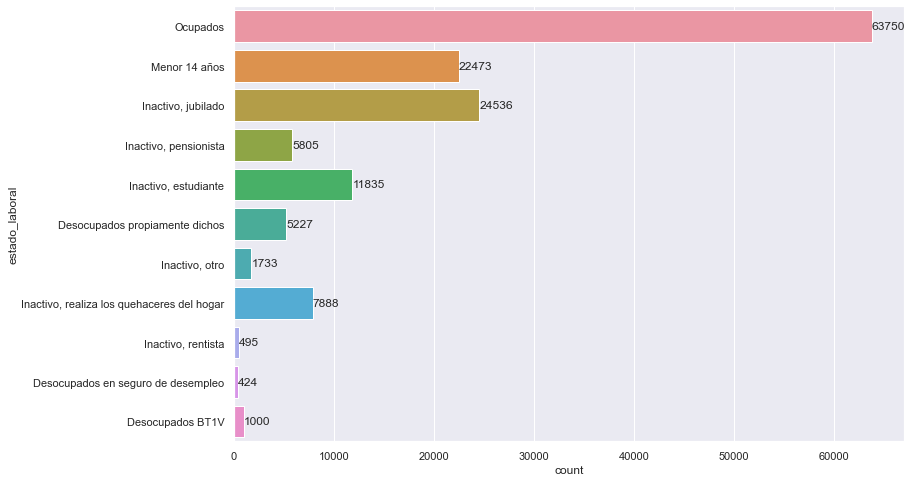

In [4]:
ax = sns.countplot(y=df['estado_laboral'])

ax.bar_label(ax.containers[0])

In [5]:
df = df[df['sueldo'] > 0]

In [6]:
df.describe() 

,sueldo
count,43451.000000
mean,32444.658052
std,25201.183379
min,200.000000
25%,18000.000000
50%,27000.000000
75%,40000.000000
max,600000.000000


In [7]:
df['sueldo'].mode()

0    30000.0
dtype: float64

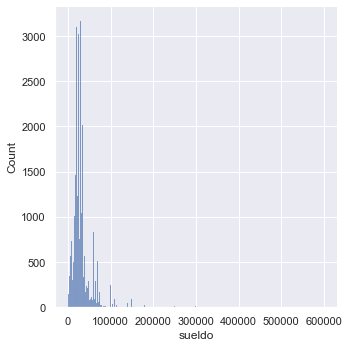

In [8]:
sns.displot(df['sueldo'])

<AxesSubplot:xlabel='sexo', ylabel='sueldo'>

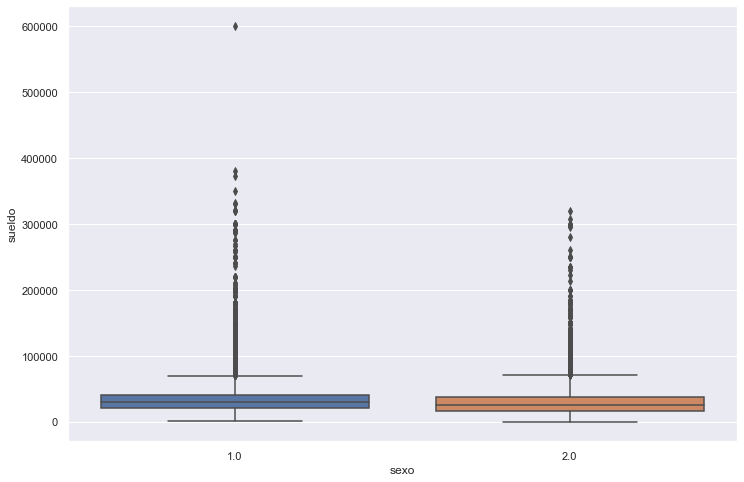

In [9]:
sns.boxplot(data=df, x=df['sexo'], y=df['sueldo'])

In [10]:
df

,sexo,estado_laboral,sueldo
nper,,,
1.0,2.0,Ocupados,86000.0
2.0,1.0,Ocupados,80000.0
1.0,1.0,Ocupados,56000.0
2.0,2.0,Ocupados,32000.0
1.0,1.0,Ocupados,15000.0
...,...,...,...
1.0,1.0,Ocupados,46000.0
1.0,2.0,Ocupados,30000.0
1.0,2.0,Ocupados,30000.0


In [11]:
df.quantile(0.25)
df.quantile(0.75)

sueldo    40000.0
Name: 0.75, dtype: float64

In [12]:
mask_quantil_25 = df['sueldo'] >= df['sueldo'].quantile(0.25)
mask_quantil_75 = df['sueldo'] <= df['sueldo'].quantile(0.75)

df_no_outliers = df[mask_quantil_25 & mask_quantil_75]

df_no_outliers

,sexo,estado_laboral,sueldo
nper,,,
2.0,2.0,Ocupados,32000.0
2.0,2.0,Ocupados,35000.0
3.0,2.0,Ocupados,26000.0
2.0,2.0,Ocupados,32000.0
3.0,2.0,Ocupados,25000.0
...,...,...,...
1.0,1.0,Ocupados,22500.0
1.0,1.0,Ocupados,27000.0
1.0,2.0,Ocupados,22000.0


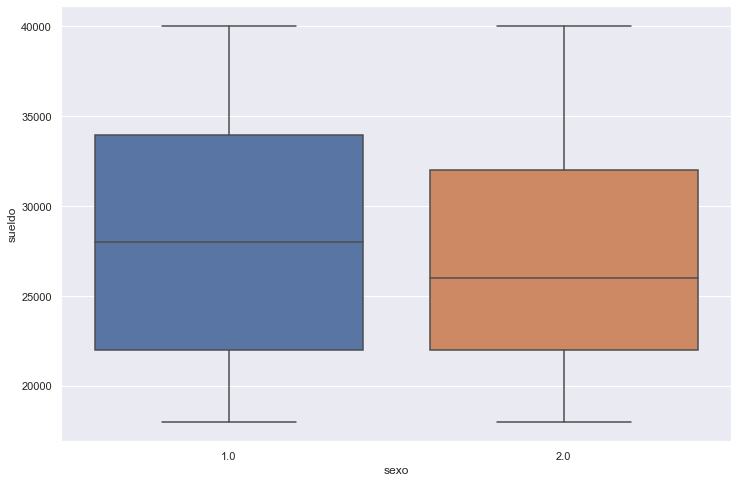

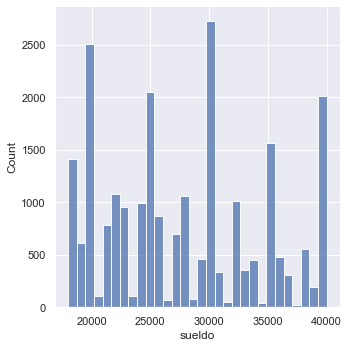

In [13]:
sns.boxplot(data=df_no_outliers, x='sexo', y='sueldo')

sns.displot(df_no_outliers['sueldo'])

In [14]:
df.count()

sexo              43451
estado_laboral    43451
sueldo            43451
dtype: int64